In [ ]:
from google.colab import files
import zipfile

# Upload file (this will show "Choose File" button in Colab/Jupyter)
uploaded = files.upload()

# Extract the uploaded zip file
zip_path = list(uploaded.keys())[0]   # get uploaded filename
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("wu3d_dataset")


Saving WU3D (1).zip to WU3D (1).zip


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf, "random_forest_model.pkl")
print("Random Forest model saved as random_forest_model.pkl")

NameError: name 'rf' is not defined

In [ ]:
import pandas as pd
import json

dataframes = []

# Loop through both files and assign labels
for file, label in [("normal.json", "normal"), ("depressed.json", "depressed")]:
    with open(f"wu3d_dataset/{file}", "r") as f:
        data_json = json.load(f)
    df = pd.DataFrame(data_json)
    df["label"] = label  # add class label
    dataframes.append(df)

# Merge into one dataset
data = pd.concat(dataframes, ignore_index=True)

print("Dataset shape:", data.shape)
print(data.head())
print(data['label'].value_counts())


Dataset shape: (32570, 11)
    label  nickname gender                                            profile  \
0  normal   汤圆s点点滴滴      女                                                小日常   
1  normal   心无挂碍wxq      女  传播正能量，广结善缘。每天懂一点佛学知识，感悟人生，净化身心，弘扬佛法，传播中国传统文化，便...   
2  normal    透心凉A兔子      女                                                  无   
3  normal       孔阿君      女                                                  无   
4  normal  路路090909      男                        所谓活着的人，就是不断挑战的人，不断攀登命运峻峰的人。   

     birthday num_of_follower num_of_following all_tweet_count  \
0           无               3               23              44   
1  2000-08-02             581              968            2877   
2  1998-04-10            1363              241            1326   
3           无               5               64               5   
4           无             141             1480            1883   

   original_tweet_count  repost_tweet_count  \
0                    43                   

In [ ]:
# Drop columns that are not useful for prediction (nickname, profile, birthday for now) and the 'tweets' column
X = data.drop(columns=["label", "nickname", "profile", "birthday", "tweets"])

# Target
y = data["label"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode gender (男/女 etc.)
if X["gender"].dtype == "object":
    X["gender"] = LabelEncoder().fit_transform(X["gender"])

# Encode target labels
y = LabelEncoder().fit_transform(y)

print(X.head())


   gender num_of_follower num_of_following all_tweet_count  \
0       0               3               23              44   
1       0             581              968            2877   
2       0            1363              241            1326   
3       0               5               64               5   
4       1             141             1480            1883   

   original_tweet_count  repost_tweet_count  
0                    43                   1  
1                    98                   0  
2                    97                   1  
3                     5                   0  
4                    62                  38  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (26056, 6) Test shape: (6514, 6)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (precision, recall, f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9187902978200798

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      2065
           1       0.93      0.96      0.94      4449

    accuracy                           0.92      6514
   macro avg       0.91      0.90      0.90      6514
weighted avg       0.92      0.92      0.92      6514


Confusion Matrix:
 [[1725  340]
 [ 189 4260]]


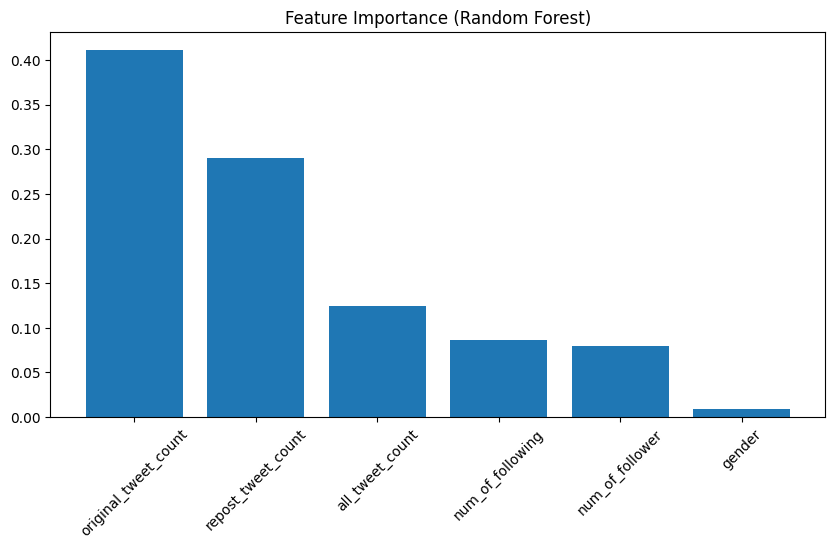

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()


**SVM**

In [ ]:
from sklearn.svm import SVC


In [ ]:
# Initialize SVM (RBF kernel is default, works well for non-linear data)
svm = SVC(kernel="rbf", random_state=42)

# Train on training set
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred_svm = svm.predict(X_test)

# Accuracy
print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Classification report
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

✅ SVM Accuracy: 0.6828369665336199

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2065
           1       0.68      1.00      0.81      4449

    accuracy                           0.68      6514
   macro avg       0.34      0.50      0.41      6514
weighted avg       0.47      0.68      0.55      6514


SVM Confusion Matrix:
 [[   0 2065]
 [   1 4448]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize and train Logistic Regression model with StandardScaler
# Using a pipeline to first scale the data and then train the model
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000))
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

✅ Logistic Regression Accuracy: 0.8523180841264968

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      2065
           1       0.91      0.87      0.89      4449

    accuracy                           0.85      6514
   macro avg       0.83      0.84      0.83      6514
weighted avg       0.86      0.85      0.85      6514


Logistic Regression Confusion Matrix:
 [[1673  392]
 [ 570 3879]]


In [ ]:
import joblib

# Save the trained Logistic Regression model to a file
joblib.dump(lr, "logistic_regression_model.pkl")
print("Logistic Regression model saved as logistic_regression_model.pkl")

Logistic Regression model saved as logistic_regression_model.pkl


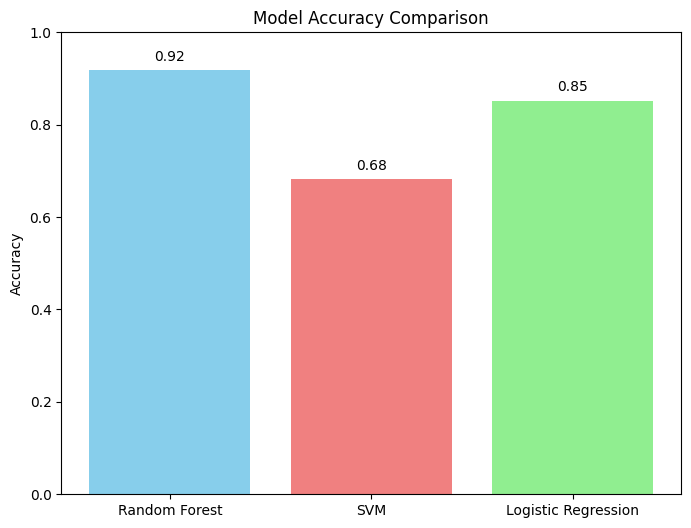

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gather the accuracy scores from the previous outputs
# Replace these with the actual accuracy values obtained from your model evaluations
rf_accuracy = 0.9187902978200798  # From Random Forest output
svm_accuracy = 0.6828369665336199 # From SVM output
lr_accuracy = 0.8523180841264968 # From Logistic Regression output

models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [rf_accuracy, svm_accuracy, lr_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for accuracy

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

# Display the chart
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'y_test' is not defined